# 06-1. 신경망 알고리즘을 벡터화하여 한 번에 전체 샘플을 사용합니다

- 사이킷런의 예제 데이터 셋은 2차원 배열
- 2차원 배열은 행을 샘플 열을 특성으로하는 행렬로 이해가능

## 벡터화된 연산은 알고리즘의 성능을 올립니다

In [1]:
from IPython.display import Image

- 넘파이, 머신러닝, 딥러닝 패키지들은 행렬연산 즉, 벡터화된 연산을 빠르게 수행함

> 배치경사하강법으로 성능을 올립니다

- 지금까지 사용한 경사하강법 알고리즘(선형회귀, 로지스특 회귀)은 알고리즘을 한 번 반복할 때 1개의 샘플을 사용하는 '확률적 경사하강법'을 사용
- 확률적 경사하강법은 가중치를 1회 업데이트 할 때 1개의 샘플을 사용하므로 손실함수의 전역최솟값을 불안정하게 찾음
- 배치경사하강법은 1회 업데이트 시, 전체 샘플을 사용하므로 손실함수의 전역 최솟값을 안정적으로 찾음
- 단, 1회 업데이트 시, 많은 데이터를 사용하므로 계산비용이 많이 들고 너무 큰 데이터셋은 배치경사하강법을 사용하지 못하는 경우도 있음

## 벡터 연산과 행렬 연산을 알아봅니다

> 점곱을 알아봅니다

- 단일층 신경망에서 z를 구했던 방법
    - 가중치와 입력을 각각 곱해서 더함
    - SingleLayer클래스의 forpass()메서드에서 사용

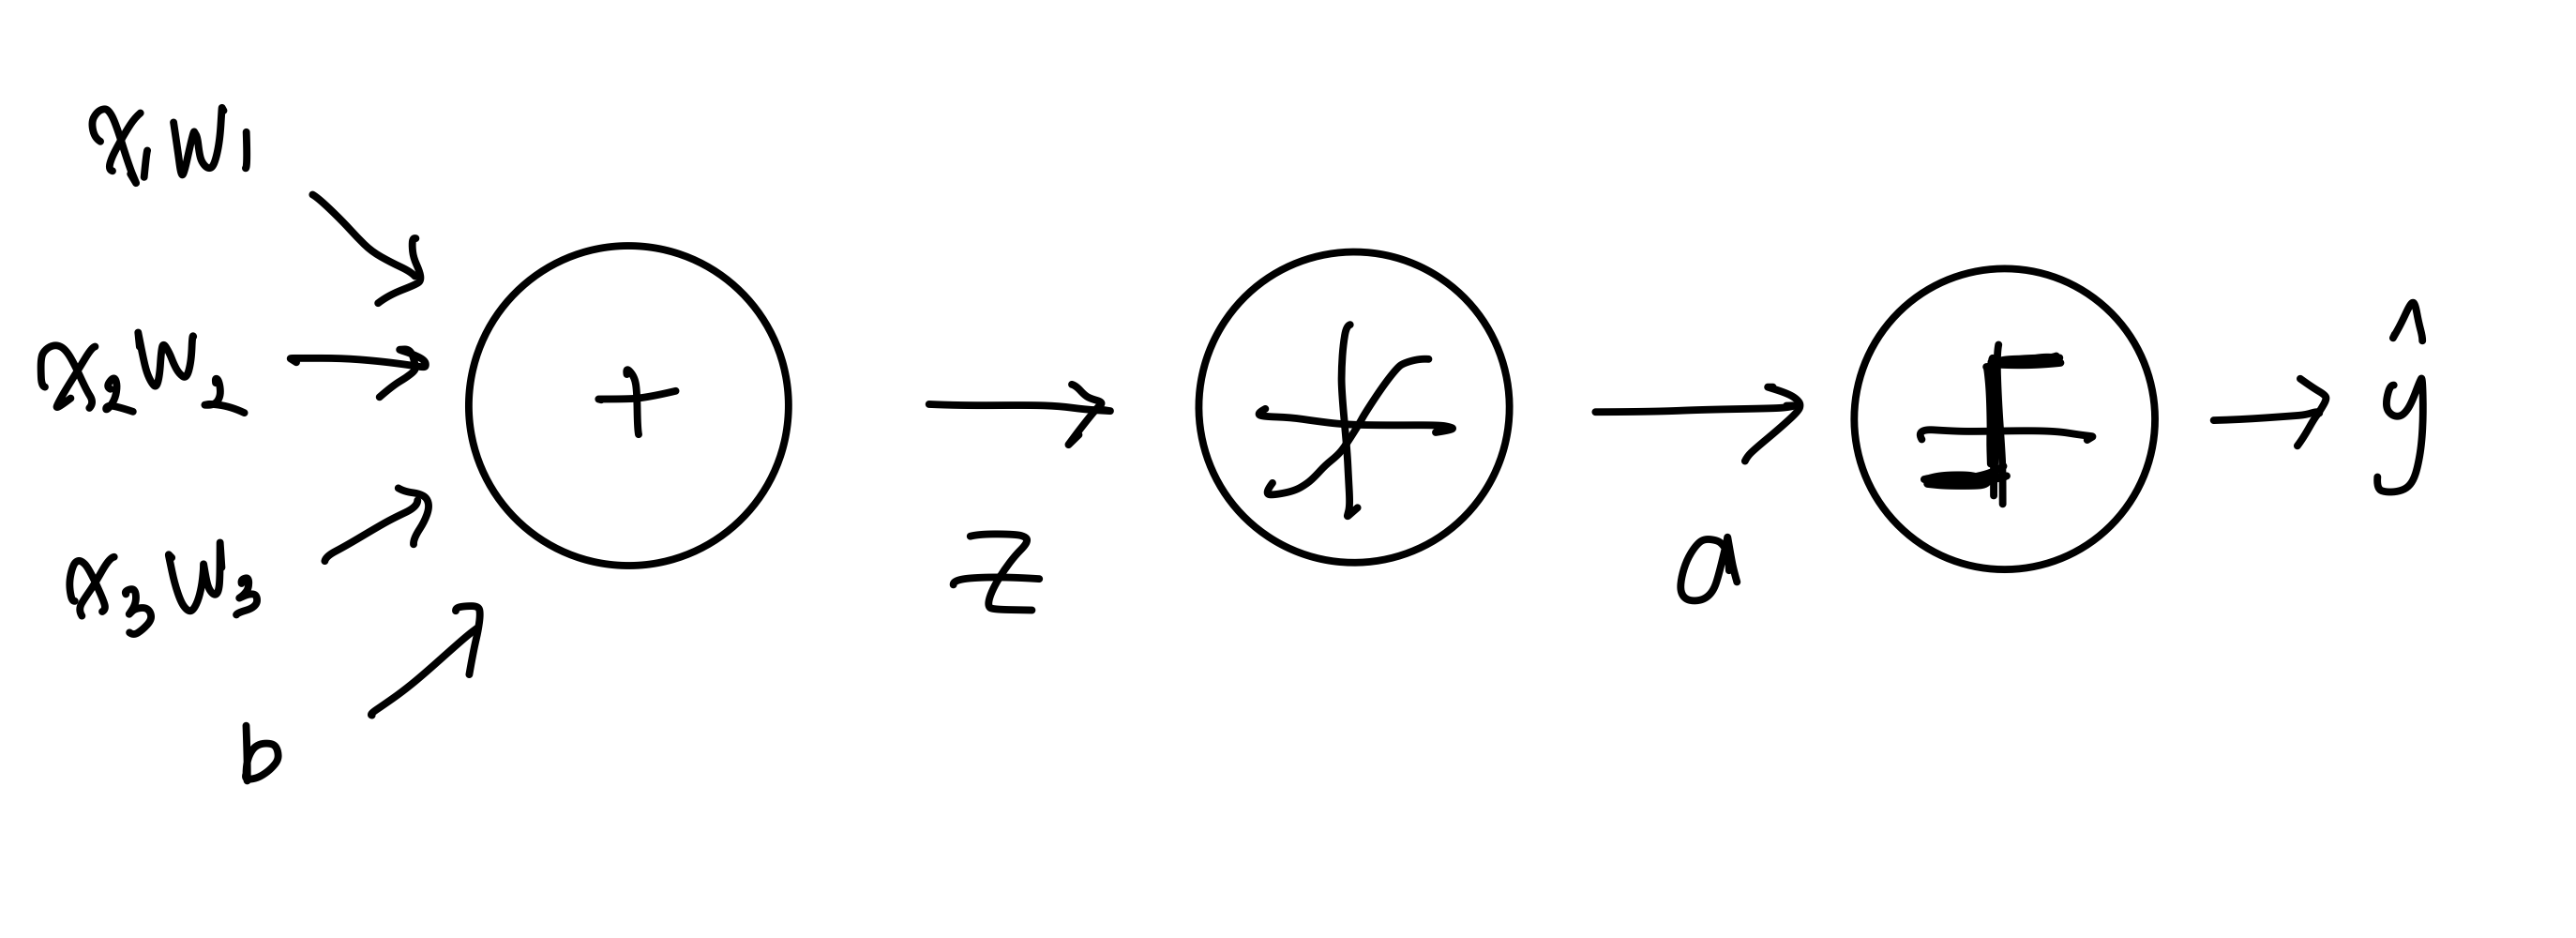

In [3]:
Image("./image/점곱.png", width=600)

> z = np.sum(x * self.w) + self.b

- 위에서 입력과 가중치의 각각의 곱을 x* self.w로 간단하게 표현할 수 있었던 이유는 넘파이의 원소별 곱셈 기능 덕분

- x = [x1, x2, ... xn]
- w = [w1, w2, ... wn]
- x * w = [x1*w1 + x2*w2 + ... xn*wn]

- x와 w는 벡터라고 부르고, 볼드로 표기
- 두 벡터를 곱하여 합을 구하는 계산을 점곱, 또는 스칼라 곱이라고 함
- 벡터 a, b에 대한 점곱은 a·b로 표기

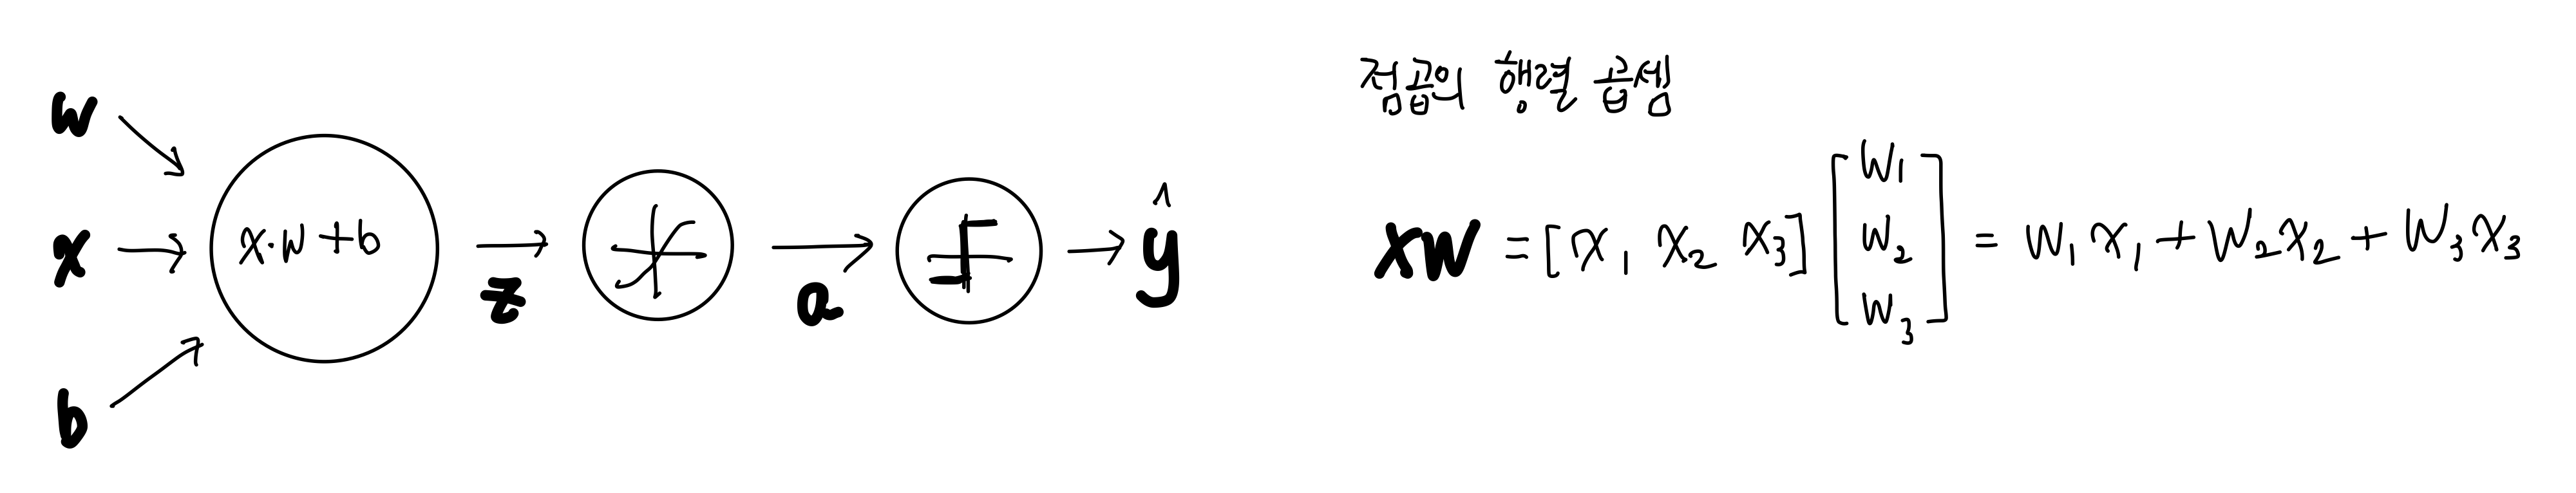

In [7]:
Image("./image/단일층신경망점곱.png", width=900)

> 점곱을 행렬 곱셈으로 표현합니다

- 점곱을 행렬곱셉으로 표기하면 행 방향으로 놓인 첫 번째 벡터와 열 방향으로 놓인 두 번째 벡터의 원소를 각각 곱한 후 더한것과 같음
- np.dot() 함수를 사용하여 np.dot(x, self.w) + self.b로 수정

> 전체 샘플에 대한 가중치 곱의 합을 행렬 곱셈으로 구합니다

- 훈련데이터의 샘플은 각 샘플이 하나의 행으로 이루어져 있음
- 행렬 곱샘을 적용하면 샘플의 특성과 가중치를 곱해서 더한 행렬을 얻을 수 있음

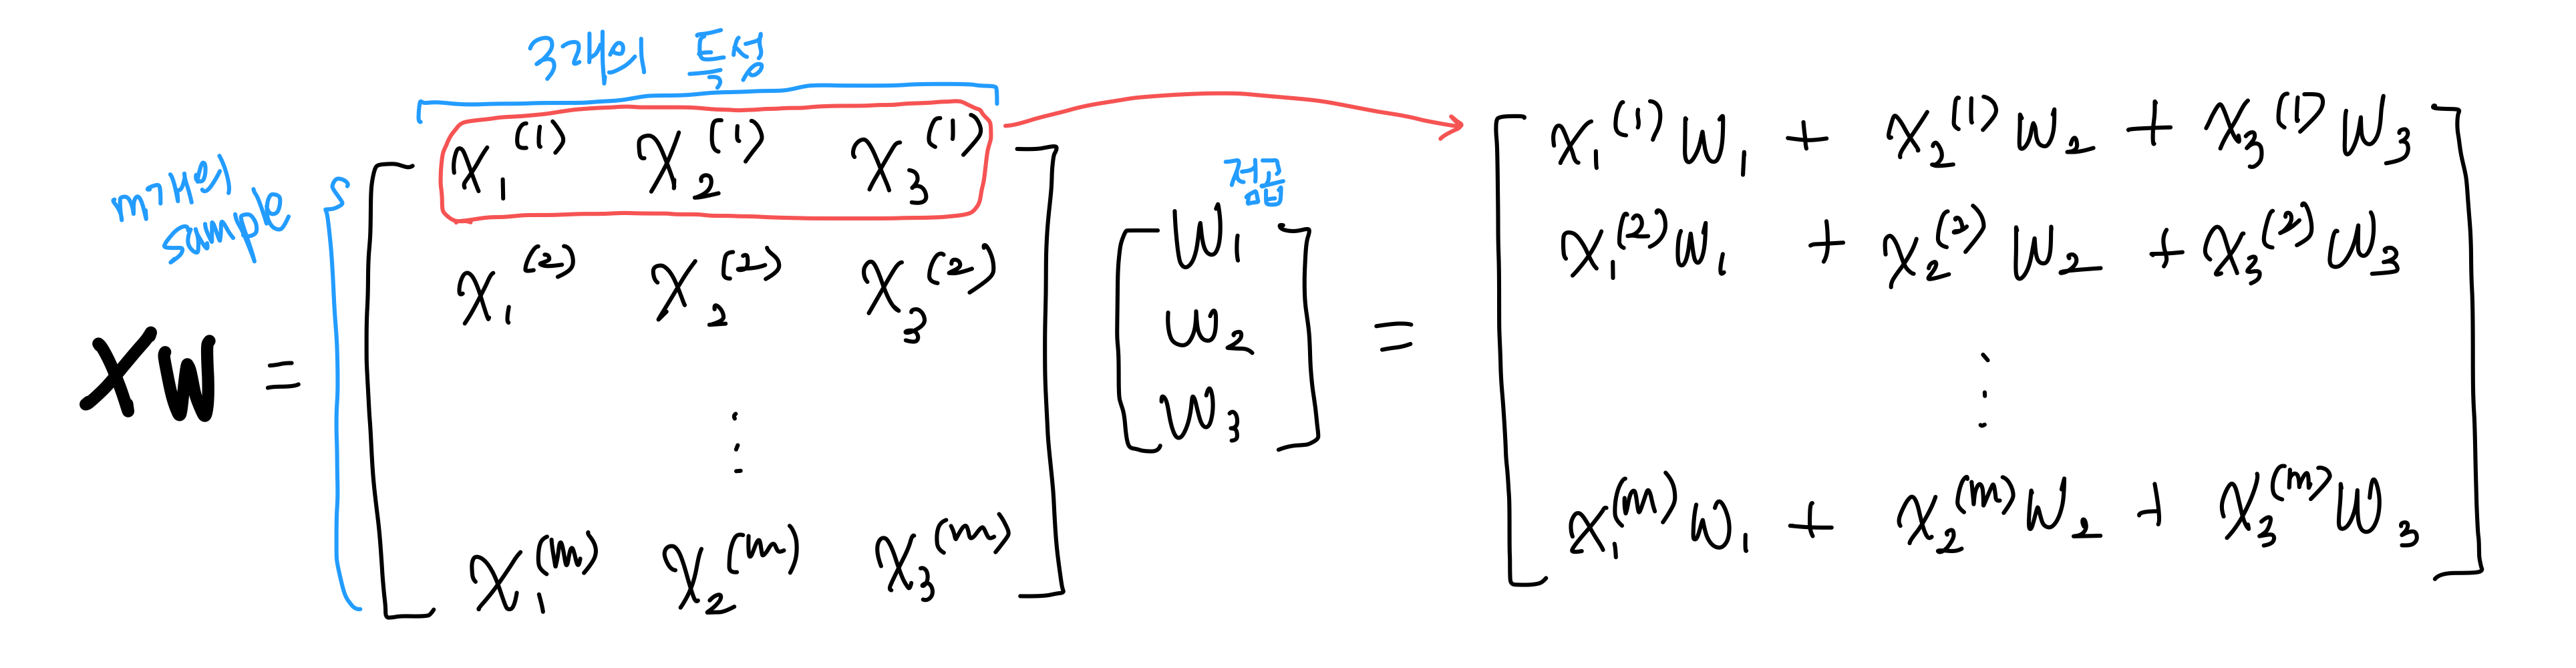

In [9]:
Image("./image/점곱행렬곱.png", width=900)

- m개의 샘플에 대해 특성 x1, x2, x3에 가중치 w1, w2, w3를 곱한 다음 더한 값들로 행렬을 만듦
- 행렬곱셈을 통해 만들어지는 행렬의 크기
    - (m, n) · (n, k) = (n, k)
- 첫 번째 행렬의 열(n)과 두 번째 행렬의 행(n)의 크기는 반드시 같아야 함
- numpy의 np.dot()함수를 사용하면 간단히 계산 가능
    - np.dot(x, w)

## SingleLayer 클래스에 배치 경사 하강법 적용하기

>1. 유방암 데이터 활용/ 필요 모듈 import

In [4]:
import numpy as np
import matplotlib.pyplot as plt

>2. 위스콘신 유방암 데이터를 훈련, 검증, 테스트 세트로 나누고 데이터 살펴보기

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

>3. 데이터세트 개수 확인하기

In [6]:
x_train.shape, x_val.shape

((364, 30), (91, 30))

>4. 정방향 계산을 행렬 곱셈으로 표현하기

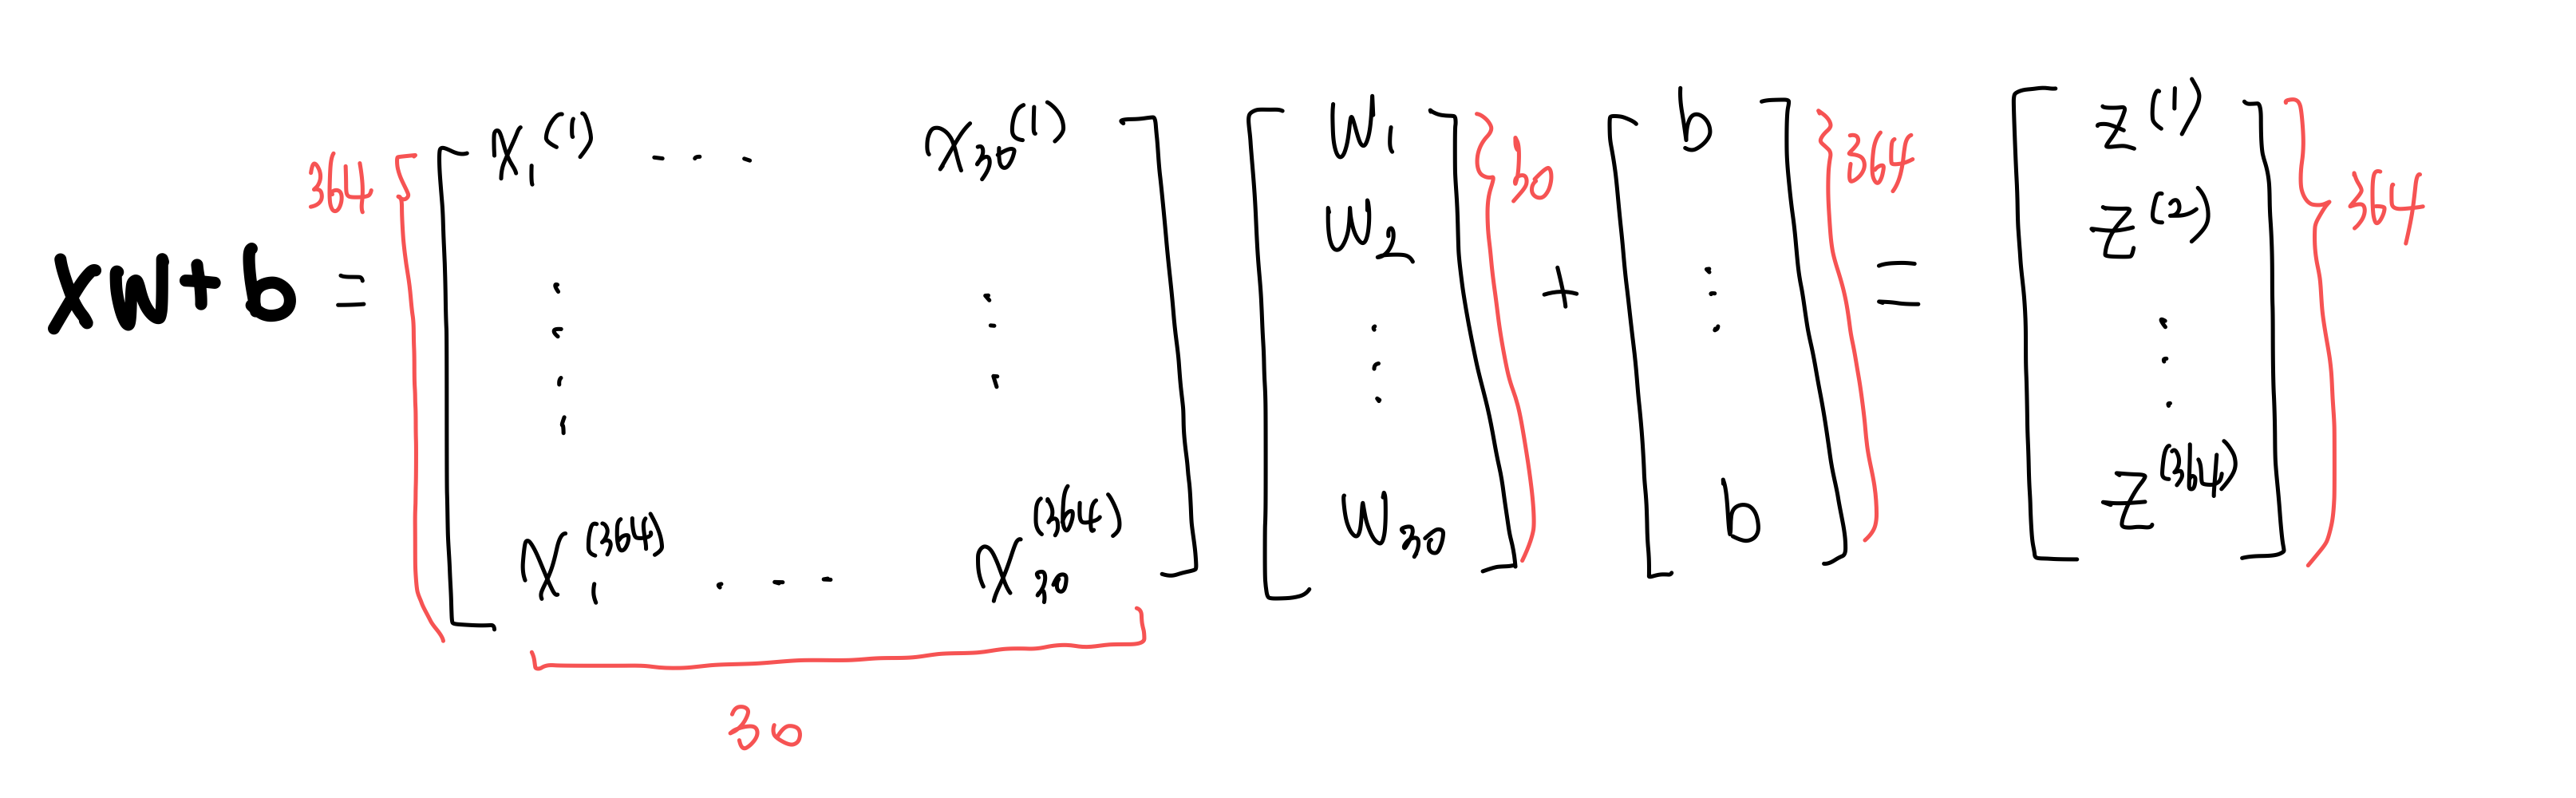

In [13]:
Image("./image/가중치곱의합행렬곱.png", width=700)

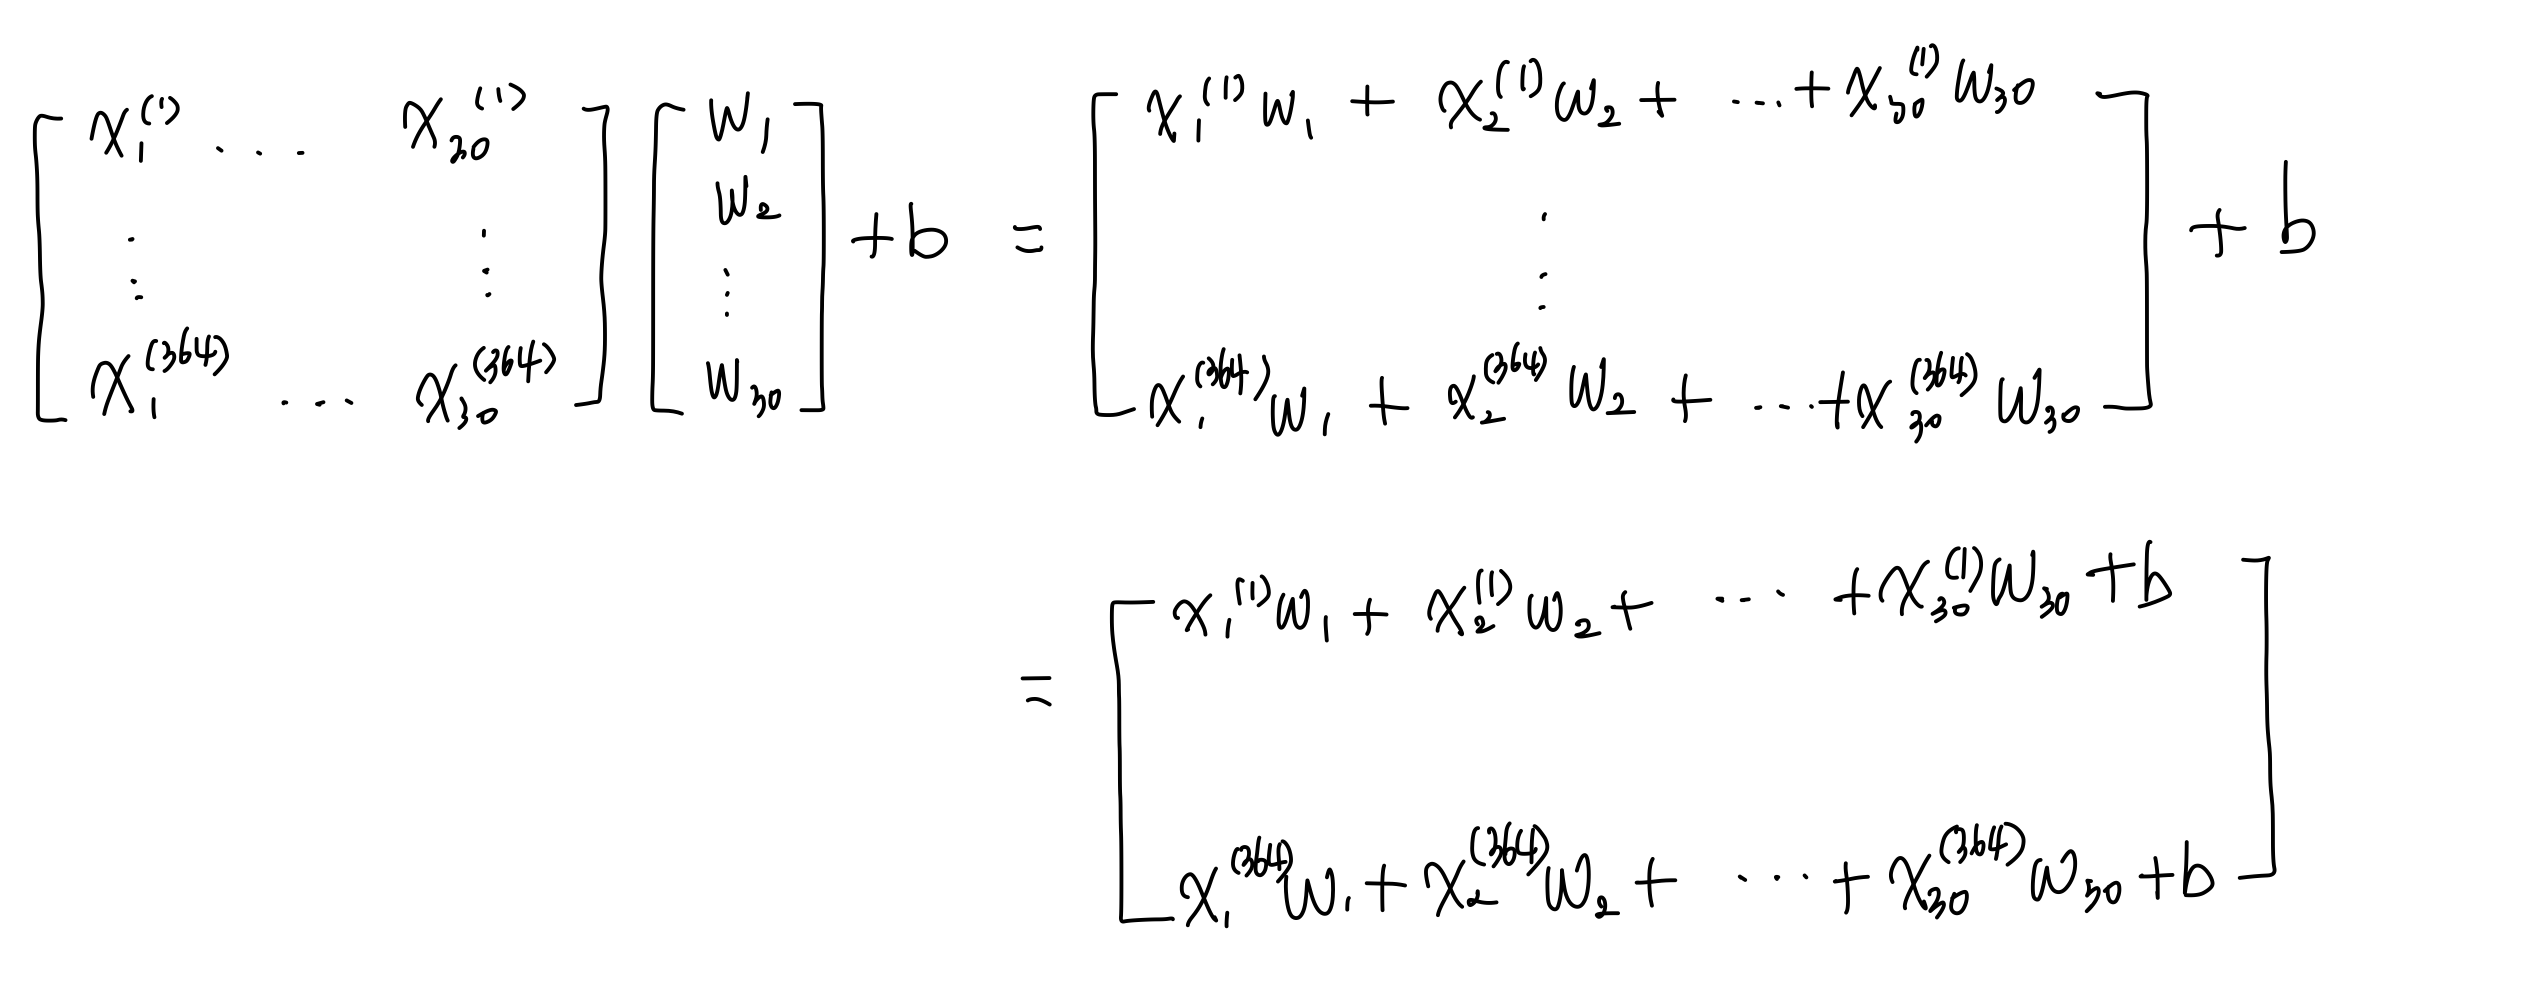

In [10]:
Image("./image/정방향계산_행렬곱.png", width=900)

- 훈련세트와 가중치를 곱한 다음 절편을 더함
- 절편을 더하기 위해 (364, 1)크기의 행렬을 따로 만들 필요는 없음
    - numpy에서는 행렬에 스칼라 값을 더하면 자동으로 행렬의 각 요소에 스칼라값을 더해줌

>5. 그래디언트 계산하기

- 그래디언트는 오차와 입력데이터의 곱
- 행렬 X를 전치하여 샘플x특성이던 행렬을 특성*샘플 행렬로 변경
- 특성을 오차와 곱할 수 있는 형태가 됨
- X의 전치행렬 크기는 (30, 364)
- 행렬의 계산은 모든 샘플의 첫 번째 특성과 오차의 곱의 합, 두 번째 특성과 오차의 곱의 합
    - 다시 전체 샘플수로 나누면 평균 그래디언트

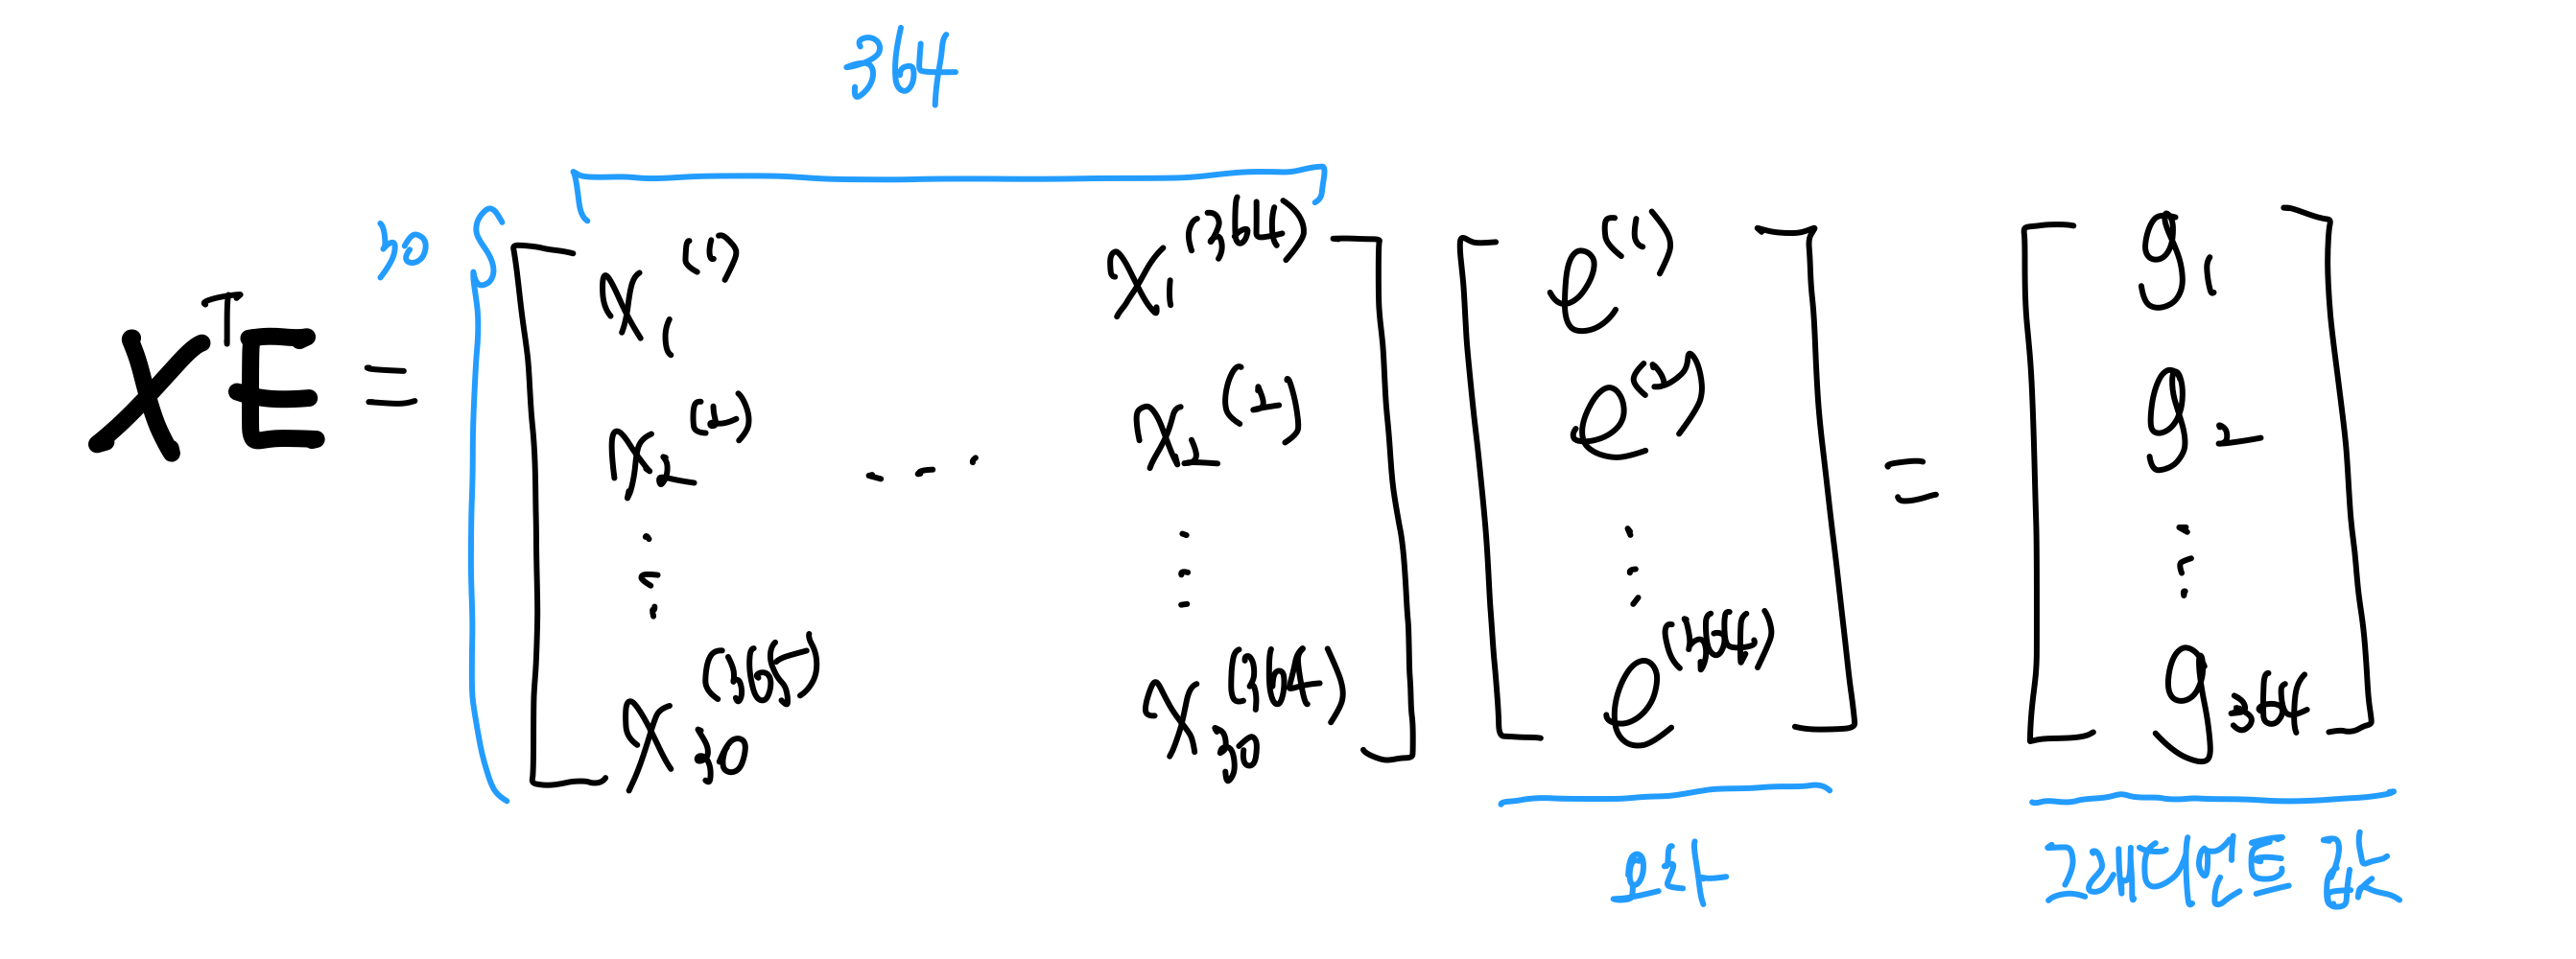

In [17]:
Image("./image/그라디언트계산.png", width=500)

>6. forpass()와 backprop()메서드에 배치 경사하강법 적용하기

In [8]:
def forpass(self, x):
    z = np.dot(x, self.w) + self.b
    return z

def backprop(self, x, err):
    m = len(x)
    w_grad = np.dot(x.T, err) / m
    b_grad = np.sum(err) / m
    return w_grad, b_grad

- len() 함수는 넘파이의 행의 크기를 반환하므로 이 값으로 그래디언트 평균을 계산

>7. fit()메서드 수정하기

- fit()메서드에는 epoch를 위한 for문과 훈련세트를 순회하기 위한 for문이 있음
- 배치경사하강법에서는 forpass()메서드와 backprop()메서드에서 전체 샘플을 한꺼번에 계산하므로 두 번째 for문이 삭제됨

In [9]:
def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    y = y.reshape(-1,1)
    y_val = y_val.reshape(-1, 1)
    m = len(x)
    self.w = np.ones((x.shape[1], 1))
    self.b = 0
    self.w_history.append(self.w.copy())
    
    for i in range(epochs):
        z = self.forpass(x)
        a = self.activation(z)
        err = -(y-a)
        w_grad, b_grad = self.backprop(x, err)
        w_grad += (self.l1 * np.sign(self.w) + self.l2 * self.w) /m
        
        self.w -= self.lr * w_grad
        self.b -= self.lr * b_grad
        self.w_history.append(self.w.copy())
        a = np.clip(a, 1e-10, 1-1e-10)
        loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
        self.losses.append((loss + self.reg_loss())/m)
        self.update_val_loss(x_val, y_val)

- 활성화함수 출력 a가 열벡터이므로 이에 맞추어 타깃값을 (m,1)크기의 열벡터로 변환
- 평균손실을 구하기 위해 np.sum()함수로 각 샘플의 손실을 더한 후 전체 샘플 개수로 나눔

>8. 나머지 메서드 수정하기

- predict() 메서드에서 사용해던 리스트 내포와 update_val_loss()메서드도 더 간단해짐

In [10]:
def predict(self, x):
    z = self.forpass(x)
    return z > 0

def update_val_loss(self, x_val, y_val):
    z = self.forpass(x_val)
    a = self.activation(z)
    a = np.clip(a, 1e-10, 1-1e-10)
    val_loss = np.sum(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
    self.val_losses.append((val_losses + self.reg_loss())/ len(y_val))

In [26]:
# 수정사항 반영

class SingleLayer: #클래스 이름 변경
    
    def __init__(self, learning_rate=0.1, l1=0, l2=0): 
        # 가중치와 절편의 초기값을 셋팅하지 않음
        # __init__ 메서드에 손실함수의 결과값을 저장하기 위한 리스트를 만듦
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses = []
        self.w_history = [] # 가중치 변화 관찰을 위한 추가
        self.lr = learning_rate # 학습률 추가
        self.l1 = l1 # l1 규제 추가
        self.l2 = l2 # l2 규제 추가
    
    def forpass(self, x):
        z = np.dot(x, self.w) + self.b
        return z

    def backprop(self, x, err):
        m = len(x)
        w_grad = np.dot(x.T, err) / m
        b_grad = np.sum(err) / m
        return w_grad, b_grad
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z)) # 시그모이드 식
        return a

    # 위에 있던 fit 함수에서 np.random.permutation함수를 적용해서 인덱스를 섞어서 추출하도록 함
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1,1)
        y_val = y_val.reshape(-1, 1)
        m = len(x)
        self.w = np.ones((x.shape[1], 1))
        self.b = 0
        self.w_history.append(self.w.copy())

        for i in range(epochs):
            z = self.forpass(x)
            a = self.activation(z)
            err = -(y-a)
            w_grad, b_grad = self.backprop(x, err)
            w_grad += (self.l1 * np.sign(self.w) + self.l2 * self.w) /m

            self.w -= self.lr * w_grad
            self.b -= self.lr * b_grad
            self.w_history.append(self.w.copy())
            a = np.clip(a, 1e-10, 1-1e-10)
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss())/m)
            self.update_val_loss(x_val, y_val)
        
    # 위에 있던 함수를 아래 함수로 바꾸면서 score 함수를 추가함
    def predict(self, x):
        z = self.forpass(x) # 정방향계산을 개별 샘플별로 반복할 필요 없음
        return z > 0

    def score(self, x, y):
        return np.mean(self.predict(x)==y.reshape(-1, 1))
    
    def reg_loss(self):
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)
        a = self.activation(z)
        a = np.clip(a, 1e-10, 1-1e-10)
        val_loss = np.sum(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append((val_loss + self.reg_loss())/ len(y_val))

>9. 훈련데이터 표준화 전처리 하기

- 안정적인 학습을 위해 사이킷런의 StandardScaler 클래스 사용

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

>10. 데이터를 SingleLayer클래스 객체에 전달하여 배치경사하강법을 적용

In [27]:
single_layer = SingleLayer(l2=0.01)
single_layer.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val, epochs=10000)
single_layer.score(x_val_scaled, y_val)

0.978021978021978

- 5장의 결과와 비교하기 위해 l2규제 매개변수를 0.01fh wlwjd
- 에포크 매개변수의 기본값을 100에서 10000으로 크게 늘림
- 에포크를 늘린 이유는 확률적 경사하강법과 배치경사하강법은 에포크마다 가중치 업데이트를 하는 횟수에 차이가 있기 때문
- 확률적 경사하강법은 훈련세트 샘플이 364개일때 100 에포크를 수행하면 36,400번의 가중치 업데이트가 일어남
- 배치경사하강법은 100번의 에포크에서 100번만 가중치 업데이트가 진행됨
- 확률적 경사하강법에서보다 더 에포크를 늘려줘야 함

>11. 검증세트로 성능 측정하고 그래프 그리기

- score()메서드에서 출력된 검증 세트의 점수는 5장과 동일하지만 손실함수의 변화는 다를 것

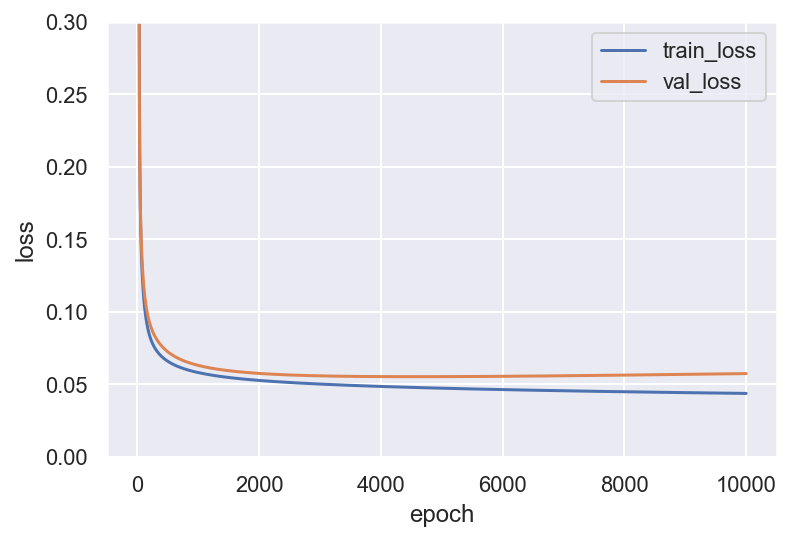

In [28]:
plt.ylim(0, 0.3)
plt.plot(single_layer.losses)
plt.plot(single_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

- 샘플을 선택하는 순서에 따라 에포크마다 손실값이 들쑥날쑥 했지만, 배치경사하강법은 전체 샘플로 가중치를 업데이트 하기 때문에 손실값이 안정적으로 감소함

>12. 가중치 변화 그래프 살펴보기

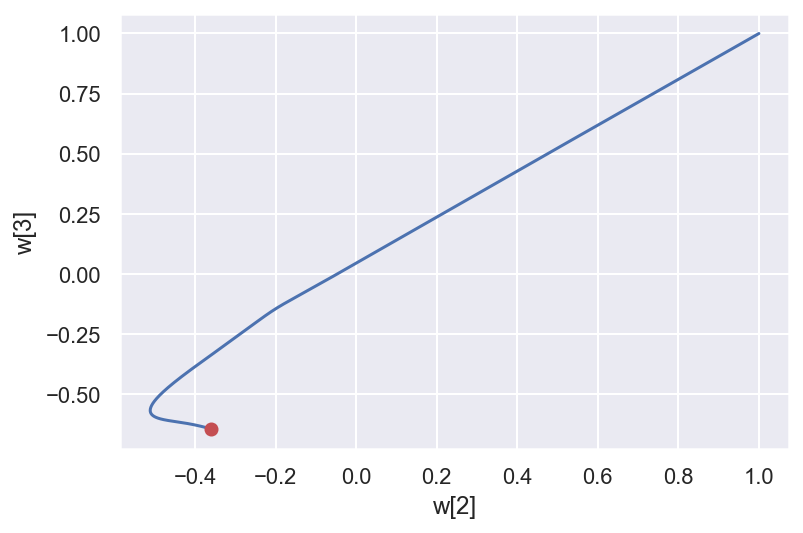

In [29]:
w2 = []
w3 = []
for w in single_layer.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

- 가중치를 찾는 경로가 다소 부드러운 곡선의 형태
- 손실값도 안정적으로 수렴
- 연산비용이 크고, 최소값 수렴시간도 오래걸림

# 06-2. 2개의 층을 가진 신경망을 구현합니다

- 지금까지는 하나의 층에 하나의 뉴런을 사용한 신경망 알고리즘으로 문제를 해결
- 하나의 층을 추가하고 뉴런의 개수도 늘림
- 행렬연산을 활용해서 여러개의 뉴런을 어떻게 표현하는지, 신경망의 구조는 어떻게 달라지는지 확인
- 2개 이상의 층을 가지는 신경망에 경사하강법을 적용해보고 각 층에 오차가 어떻게 역전파 되는지도 확인

## 하나의 층에 여러 개의 뉴런을 사용합니다

- 하나의 층에 여러 개의 뉴런을 사용하면 입력층에서 전달되는 특성이 각 뉴런에 모두 전달될 것
- 3개의 특성과 2개의 뉴런이 있는 경우

<이미지>

- 3개의 특성은 각각 2개의 뉴런에 모두 전달되어 z1, z2를 출력함
- z1을 계산할 때 x1, x2, x3와 곱해지는 가중치 3개가 필요하고, z2를 계산할 때도 가중치 3개가 필요함
- 뉴런마다 절편도 하나씩 필요함
- 이 때 가중치를 입력특성 번호와 뉴런의 번호로 표현하면 다음과 같은 계산식이 나옴
    - x1w11 + x2w21 + x3w31 + b = z1
    - x1w12 + x2w22 + x3w32 + b = z2
- 뉴런이 2개 이므로, 출력도 2개. 이 출력값을 편의상 z1, z2라고 부름
- 여러 개의 뉴런을 사용함으로써 가중치가 1개의 열을 가진 벡터가 아닌 2차원의 행렬로 변환됨

<171쪽 이미지 삽입>

- 가중치 행렬의 크기는 (입력의 개수, 출력의 개수)로 생각하면 됨
- 지금은 2개의 뉴런을 사용하고 있으므로 출력의 수는 2, 입력은 3개이므로 (3, 2)의 가중치 행렬이 만들어짐
- 샘플 전체에 대한 수식
    - XW1 + b1 = Z1
- W1은 첫 번째 층의 가중치 행렬이라는 의미로 첨가 1을 사용

## 출럭을 하나로 모읍니다

- 위스콘신 유방암 데이터세트에서 우리는 악성종양인지, 정상종양인지 구분해야함
- 즉, 이진분류 문제로 각 뉴런에서 출력된 값을 하나의 뉴런으로 다시 모아야 함
- 유방암데이터 1개의 샘플에 있는 여러 특성 값을 각 뉴런에 통과시키면 여러 개의 출력값이 나오는데,\
    이 값들 중 하나만 골라 이진분류에 사용할 수 는 없기 때문
- 그래서 출력 값을 다시 모아 이진분류를 수행할 기준값(z)를 만드는 것

<172페이지 그림>

- z1, z2는 마지막 뉴런으로 모으기 전의 출력값이고, a1, a2는 활성화 함수에 통과시킨 값 (편의상 활성화 출력이라 부르겠음)
- 2개의 홀성화 출력이 마지막 뉴런에 입력되고 여기에 절편이 더해져 z가 만들어짐
- a1w2 + a2w2 + b2 = z(선형방정식)
    - 이 식은 샘플 1개에 대한 수식
    - 샘플 전체에 대한 행렬 곱셈 표현은 다음과 같음
    - A1W2 + b2 = Z2
    - 행렬A1의 크기는 (전체 샘플 수, 2)이므로 (m,2)이고, W2의 크기는 (입력의 크기, 출력의 크기) 이므로 (2,1)

## 은닉층이 추가된 신경망을 알아봅니다

- 앞서 살펴본 구조를 하나로 연결

<이미지>

- 2개의 뉴런과 2개의 층을 가진 신경망이 만들어짐
- 이 때 입력값이 모여 있는 층은 입력층이라 부르는데 보통 입력층은 층의 개수에 포함시키지 않음
- 입력층의 값들은 출력층으로 전달되기 전에 2개의 뉴런으로 구성된 은닉층을 통과함
- 그 다음 은닉층을 통과한 값들이 출력층에서 하나로 합쳐짐 (절편도 각 뉴런의 계산에 포함되지만 표시하지 않음)

> 입력과 출력은 행렬로 표기합니다

- 앞에서 그림으로 그린 개별 값들을 행렬로 표기하면 훨씬 간단함

<이미지>

- 2개의 층을 가진 신경망은 행렬X, 첫번째 층의 가중치 행렬 W1과 절편 b1, 첫 번째 층의 출력 Z1, 첫 번째 층의 활성화 출력 A1, \
    두번째 층의 가중치 향렬 W2와 절편 b2, 두 번째 층의 출력 Z2로 나타낼 수 있음

## 다층 신경망의 개념을 정리합니다

- 보통 다층 신경망의 각 층은 2개 이상의 뉴런으로 구성

>활성화 함수는 층마다 다를 수 있지만 한 층에서는 같아야 합니다

- 각 층은 하나 이상의 뉴런을 가지는데, 은닉층과 출력층에 있는 모든 뉴런에는 활성화 함수가 필요
- 단, 같은 층에 있는 뉴런은 모두 같은 활성화 함수를 사용해야 함
- 예) 이진분류 문제에는 출력층의 활성화 함수로 시그모이드 함수를 사용해야함

>모든 뉴런이 연결되어 있으면 완전 연결 신경망이라고 합니다

- 위의 신경망은 입력층과 은닉층, 출력층 사이의 뉴런들이 모두 연결되어 있기 때문에 완전 연결 신경망이라고 부름
- 완전연결 신경망은 인공신경망의 한 종류이며 가장 기본적인 신경망 구조
- 이렇게 뉴런이 모두 연결되어 있는 층을 완전 연결층이라고 부름
- 이 외에도 데이터 흐름이 순환되는 순환 신경망, 정방향으로 데이터가 흐르지만 완전히 연결되어 있지 않은 합성곱 신경망도 있음

## 다층 신경망에 경사 하강법을 적용합니다

- 층이 2개인 다층 신경망에 데이터와 가중치, 손실함수를 표시하고 구조를 설명한 후 경사하강법이 다층 신경망에 어떻게 적용되는지 확인

<이미지>

- 첫 번째 은닉층
    - 그림을 보면 입력데이터 X와 가중치 W1을 곱하고 절편 b1을 더해 Z1이 됨
    - Z1은 활성화 함수를 통과하여 A1이 됨
- 출력층
    - 첫 번째 은닉층의 활성화 출력 A1과 출력층의 가중치 W2를 곱하고 절편 b2를 더해 Z2를 만듦
    - Z2는 다시 활성화 함수를 통과하여 A2가 됨
- A2의 값을 보고 0.5보다 크면 양성, 그렇지 않으면 음성으로 예측
- 신경망에 경사하강법을 적용하려면 W2와 b2 그리고 W1, b1에 대한 손실함수 L의 도함수를 구해야 함
    - 각 층의 가중치와 절편에 대해 손실함수를 미분
    - 미분 순서는 출력층에서 은닉층 방향이며, 손실함수 L은 로지스틱 손실함수

>가중치에 대하여 손실함수를 미분합니다(출력층)